## Homework 3 - CIS 662 - Introduction to Machine Learning and Algorithms
#### Name: Haravindan Jayasenan Jain (SUID: 986048352)

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

#### Importing the dataset

In [2]:
data = pd.read_csv("1-10.csv")
print(data)

    univ_rank first_initial last_initial  cit_2017  cit_2018  cit_2019  \
0           1             A            B       255       261       277   
1           1             C            D       323       503       583   
2           1             I            C      4088      4262      4721   
3           1             A            A      1099      1010       851   
4           1             P            A       422       804      1103   
..        ...           ...          ...       ...       ...       ...   
95         10             A            F       800       841       951   
96         10             A            A       611       615       664   
97         10             R            A      2060      3267      4410   
98         10             S            A      1587      1986      2506   
99         10             D            A       388       440       352   

    cit_2020  cit_2021  cit_2022  h_index  i_10_index  
0        288       371       401       19          23  

#### Splitting the dataset into training set (80%) and test set (20%)

In [3]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#### Selecting the training features

In [4]:
#University rank and all (2017-2021) citation numbers
X_train = train_data.iloc[:,3:8].values
print(X_train)

[[   50   169   196   438   702]
 [    0     0    18    71   128]
 [  301   319   509   488   554]
 [  167   205   296   398   478]
 [  843   989  1223  1123  1115]
 [   29   113   299   429   558]
 [  202   286   427   433   390]
 [  611   615   664   671   664]
 [  280   279   520   914  1363]
 [  198   228   258   211   239]
 [   14    20    44    40    53]
 [  168   201   265   371   527]
 [    7    26    54    90    94]
 [  294   313   292   270   192]
 [  171   166   168   145   159]
 [  887  1270  2047  2591  2844]
 [  245   311   348   404   416]
 [  141   183   283   369   452]
 [ 2073  2439  3161  3817  4515]
 [  209   197   229   206   202]
 [    0     0    16   117   237]
 [  367   343   395   327   287]
 [  329   377   406   367   415]
 [  800   841   951   941  1064]
 [ 4375  6356  7916  8779 10021]
 [  839   900   870  1030  1273]
 [  425   587   791  1048  1280]
 [  706  1671  3166  5181  7540]
 [  303   321   346   440   491]
 [   26    26    48    57    87]
 [  398   

#### Selecting the testing features 

In [5]:
X_test = test_data.iloc[:,3:8].values
print(X_test)

[[  133   165   220   210   246]
 [  921  1293  1913  2342  3113]
 [ 1832  1738  1734  1745  1779]
 [  285   329   298   329   379]
 [   93    66    85   130   127]
 [ 3989  8160 12623 17157 22422]
 [  283   356   468   650  1097]
 [   22    17    27    16    46]
 [  874   962  1097  1360  1692]
 [  255   261   277   288   371]
 [   90   137   171   171   180]
 [  856   942   921  1009  1007]
 [  110   118   124   139   182]
 [ 1532  1623  1696  1643  1844]
 [  462   579   608   725   654]
 [  422   804  1103  1349  1560]
 [  279   332   356   368   410]
 [  111   117   147   153   173]
 [ 2972  4832  5535  6529  7348]
 [    1     4    11    36    60]]


#### Using the elbow method to find the optimal number of clusters

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

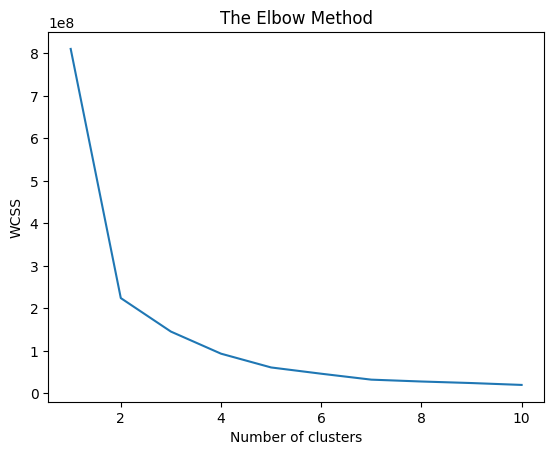

In [6]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 41)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #Within-cluster sum of squares
plt.show()

#### Training the K-Means model with the 2 clusters based on the plot(elbow point)

In [7]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=42)
kmeans.fit(X_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

#### Creating the dependable variable vector(showcasing the cluster number) for the test data

In [8]:
y_kmeans_test = kmeans.predict(X_test)
print(y_kmeans_test)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


#### Storing the 2022 citation values(actual)

In [9]:
y_train_2022 = train_data.iloc[:,8].values
y_test_2022 = test_data.iloc[:,8].values

#### 1. Predicting 2022 citations using nearest neighbor

In [10]:
# (1) Finding the nearest neighbor from the training set for each data point in the test set.
nearest_neighbor_predictions = []
for test_point in X_test:
    distances = np.linalg.norm(X_train - test_point, axis=1)  # Calculating Euclidean distances
    nearest_neighbor_index = np.argmin(distances)
    nearest_neighbor_citation_2022 = y_train_2022[nearest_neighbor_index]  # 2022 citation number
    nearest_neighbor_predictions.append(nearest_neighbor_citation_2022)
print(nearest_neighbor_predictions)
print(y_test_2022)

[324, 3055, 1752, 379, 140, 10870, 1079, 100, 1736, 440, 140, 1103, 140, 1752, 59, 1237, 379, 140, 6662, 100]
[  220  3416  1763   392   130 26211  1754    50  1664   401   195  1145
   176  1993   604  1743   365   180  7255    84]


#### 2. Predicting 2022 citations using the point nearest the cluster centroid

In [11]:
# Predicting the cluster labels for the test set
cluster_labels = kmeans.predict(X_test)

# Initializing a list to store predictions
centroid_predictions = []

# Iterating through each test point
for i in range(len(X_test)):
    test_point = X_test[i]
    cluster_label = cluster_labels[i]

    # Finding the indices of training points in the same cluster as the test point
    same_cluster_indices = np.where(cluster_labels == cluster_label)[0]

    # Calculating the centroid of the cluster using training points in the same cluster
    cluster_data = X_train[same_cluster_indices]
    cluster_centroid = np.mean(cluster_data, axis=0)

    # Finding the index of the training data point closest to the cluster centroid
    distances_to_centroid = np.linalg.norm(cluster_data - cluster_centroid, axis=1)
    closest_point_index = same_cluster_indices[np.argmin(distances_to_centroid)]

    # Using the closest training data point to predict the 2022 citation
    centroid_prediction = y_train_2022[closest_point_index]  # 2022 citation number
    centroid_predictions.append(centroid_prediction)

# Printing the predictions for the 2022 citation
print("Predictions for 2022 Citation (Closest Training Point to Centroid):", centroid_predictions)
print(y_test_2022)

Predictions for 2022 Citation (Closest Training Point to Centroid): [616, 616, 616, 616, 616, 707, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 616, 707, 616]
[  220  3416  1763   392   130 26211  1754    50  1664   401   195  1145
   176  1993   604  1743   365   180  7255    84]


#### 3. Predicting 2022 citations using the point nearest the cluster centroid

In [12]:
# Predicting the cluster labels for the test set
cluster_labels = kmeans.predict(X_test)

# Initializing a list to store predictions
average_predictions = []

# Iterating through each test point
for i in range(len(X_test)):
    test_point = X_test[i]
    cluster_label = cluster_labels[i]

    # Finding the indices of training points in the same cluster as the test point
    same_cluster_indices = np.where(cluster_labels == cluster_label)[0]

    # Calculating the average of all other training data points in the same cluster
    other_cluster_points = np.delete(X_train[same_cluster_indices], np.where(same_cluster_indices == i), axis=0)
    average_point = np.mean(other_cluster_points, axis=0)

    # Finding the training data point closest to the average_point using Euclidean distance
    distances_to_average = np.linalg.norm(other_cluster_points - average_point, axis=1)
    closest_point_index = same_cluster_indices[np.argmin(distances_to_average)]

    # Using the closest training data point to predict the 2022 citation
    average_prediction = y_train_2022[closest_point_index]  # 2022 citation number
    average_predictions.append(average_prediction)

# Printing the predictions for the 2022 citation
print("Predictions for 2022 Citation (Closest Training Point to Average):", average_predictions)
print(y_test_2022)

Predictions for 2022 Citation (Closest Training Point to Average): [312, 312, 3055, 616, 616, 707, 616, 616, 616, 616, 616, 616, 616, 616, 616, 3055, 616, 616, 707, 616]
[  220  3416  1763   392   130 26211  1754    50  1664   401   195  1145
   176  1993   604  1743   365   180  7255    84]


#### Predicting 2022 citations using average of all others from the training set in the same cluster. 


In [13]:
# Calculating the absolute difference magnitude between two lists of numbers
def calculate_absolute_difference(test_values, predictions):
    return np.abs(np.array(test_values) - np.array(predictions))

# Method 1: Nearest Neighbor
nearest_neighbor_absolute_diff = calculate_absolute_difference(y_test_2022, nearest_neighbor_predictions)

# Method 2: Closest Training Point to Centroid
centroid_absolute_diff = calculate_absolute_difference(y_test_2022, centroid_prediction)

# Method 3: Closest Training Point to Average
average_absolute_diff = calculate_absolute_difference(y_test_2022, average_prediction)

# Creating a DataFrame to tabulate the results
results = pd.DataFrame({
    'Method': ['Nearest Neighbor', 'Closest Training Point to Centroid', 'Closest Training Point to Average'],
    'Average Difference Magnitude': [nearest_neighbor_absolute_diff.mean(), centroid_absolute_diff.mean(), average_absolute_diff.mean()]
})

# Printing the results
print(results)

                               Method  Average Difference Magnitude
0                    Nearest Neighbor                        938.20
1  Closest Training Point to Centroid                       2268.95
2   Closest Training Point to Average                       2268.95
